<a href="https://colab.research.google.com/github/Se-Boruk/Ucz_nienadzorowane_projekt/blob/Clustering-v0.1/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from DataBase.DataBase_Functions import Custom_DataSet_Manager as DB
import Config as con
from datasets import load_dataset
import torch
from InPainter.Architectures import Encoder_v0 

In [16]:
manager = DB(
    DataSet_path=r'C:\Users\jakub\Desktop\Repozytoria Github\Databases\Uczenie ze wzmocnieniem',
    train_split=0.7,
    val_split=0.15,
    test_split=0.15,
    random_state=259189
    )

# Nowa sekcja

In [17]:
manager.download_database("Artificio/WikiArt_Full")

Dataset is alredy downloaded!


In [18]:
train, val, test = manager.load_dataset_from_disk()

print(train[0])  # Przykładowy rekord
print(len(train), len(val), len(test))

{'style': 'Rococo', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x234D4576910>}
72274 15488 15488


In [19]:
from collections import Counter

style_count = Counter(train["style"])
print(style_count)
style_count = dict(style_count)
print(style_count)


Counter({'Impressionism': 7489, 'Realism': 7352, 'Romanticism': 6501, 'Expressionism': 4972, 'Post-Impressionism': 4050, 'Art Nouveau (Modern)': 3429, 'Baroque': 3022, 'Surrealism': 2917, 'Symbolism': 2454, 'Rococo': 1910, 'Northern Renaissance': 1683, 'Naïve Art (Primitivism)': 1604, 'Neoclassicism': 1428, 'Abstract Expressionism': 1424, 'Cubism': 1202, 'Ukiyo-e': 1003, 'Early Renaissance': 980, 'High Renaissance': 935, 'Mannerism (Late Renaissance)': 934, 'Art Informel': 895, 'Magic Realism': 720, 'None': 697, 'Abstract Art': 678, 'Academicism': 670, 'Color Field Painting': 636, 'Pop Art': 529, 'Fauvism': 504, 'Lyrical Abstraction': 460, 'Art Deco': 449, 'Concretism': 405, 'Ink and wash painting': 372, 'Op Art': 372, 'Neo-Romanticism': 372, 'Pointillism': 330, 'Minimalism': 316, 'Tachisme': 311, 'Neo-Expressionism': 300, 'Naturalism': 298, 'Luminism': 281, 'Shin-hanga': 279, 'Hard Edge Painting': 275, 'Orientalism': 273, 'Sōsaku hanga': 243, 'Divisionism': 241, 'New Realism': 237, 'R

In [20]:
# style_count is a dict mapping style -> count
for i in style_count:
    print(i, style_count[i])

Rococo 1910
Baroque 3022
Art Nouveau (Modern) 3429
Luminism 281
Realism 7352
Neo-Expressionism 300
Romanticism 6501
Surrealism 2917
Ink and wash painting 372
Art Informel 895
Color Field Painting 636
Post-Impressionism 4050
Impressionism 7489
Sōsaku hanga 243
Mannerism (Late Renaissance) 934
Contemporary Realism 219
Concretism 405
Ukiyo-e 1003
Early Renaissance 980
Divisionism 241
Lyrical Abstraction 460
Expressionism 4972
Orientalism 273
Abstract Expressionism 1424
Shin-hanga 279
Neoclassicism 1428
Northern Renaissance 1683
Romanesque 40
Pop Art 529
Symbolism 2454
Metaphysical art 144
Tenebrism 155
Naïve Art (Primitivism) 1604
Japonism 85
High Renaissance 935
Proto Renaissance 195
Naturalism 298
Abstract Art 678
Neo-baroque 75
Fauvism 504
Magic Realism 720
Regionalism 230
Social Realism 216
Op Art 372
Ottoman Period 47
Neo-Romanticism 372
Muralism 95
Tachisme 311
Academicism 670
Cubism 1202
Biedermeier 86
None 697
Pointillism 330
Mechanistic Cubism 53
New European Painting 20
Socialis

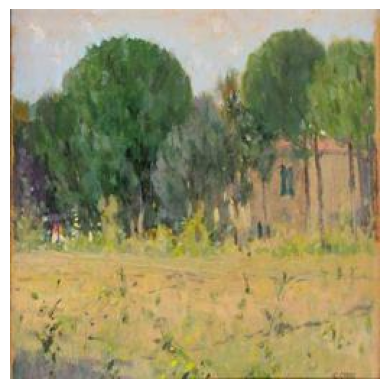

{'style': 'Impressionism', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x2356B663E90>}


In [21]:
from PIL import Image
import matplotlib.pyplot as plt

number = 55

sample = train[number]["image"]  # To już jest obiekt PIL.Image
plt.imshow(sample)
plt.axis("off")
plt.show()
print(train[number])

In [22]:
unique_styles = len(set(train["style"]))
print(unique_styles)

134


In [23]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Uruchomione na:", device)

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

Uruchomione na: cpu
PyTorch version: 2.9.1+cpu
CUDA available: False
CUDA device: None


In [24]:
checkpoint = torch.load("best_inpainter.pth", map_location=device)
full_state = checkpoint["encoder_state_dict"]

In [25]:
encoder = Encoder_v0(input_channels=3, base_filters=32).to(device)
encoder_state = encoder.state_dict()     # klucze z encodera

In [26]:
filtered_state = {
    k: v for k, v in full_state.items()
    if k in encoder_state
}

In [27]:
encoder_state.update(filtered_state)
encoder.load_state_dict(encoder_state)
encoder.eval()

Encoder_v0(
  (input_conv_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (enc_0): Processing_Block(
    (conv_1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm_1): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (act_1): LeakyReLU(negative_slope=0.2, inplace=True)
    (conv_21): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16)
    (norm_21): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (conv_22): Conv2d(16, 16, kernel_size=(1, 1), stri

In [46]:
import torchvision.transforms as T
import numpy as np
import time

transform = T.Compose([
    T.ToTensor(),                         # [0,1]
    T.Normalize([0.5]*3, [0.5]*3)         # [-1,1]
])

i = 0
features_list = []
start = time.time()
for images_pil in test["image"]:
    i += 1
    if i % 1000 == 0:
        print(f"Przetworzono {i} obrazów w czasie {(time.time() - start)/60:.2f} minut")
    # 2. Zamień na tensor
    img = transform(images_pil).unsqueeze(0).to(device)  # (1,3,H,W)

    # 3. Przepuść przez encoder
    with torch.no_grad():
        features = encoder(img)
    features = features.cpu().numpy().reshape(-1)  # spłaszcz do 1D
    features_list.append(features)


Przetworzono 1000 obrazów w czasie 249.59 sekund
Przetworzono 2000 obrazów w czasie 595.33 sekund
Przetworzono 3000 obrazów w czasie 945.97 sekund


KeyboardInterrupt: 

In [ ]:
print(features.shape)
print(features.reshape(1,-1).shape)
print(features_list.size())


torch.Size([1, 128, 32, 32])
torch.Size([1, 131072])


In [43]:
print(len(test["image"]))

15488
